<a href="https://colab.research.google.com/github/Lakshika146/Cataract_Prediction_App/blob/main/cataractPrediction_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from tensorflow.keras import models, layers
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir ="drive/My Drive/Programs/data/training/"
test_dir="drive/My Drive/Programs/data/testing/"

In [ ]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

2 Classes
2112 Train images
400 Test images


In [ ]:

# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
trainGenerator = train_datagen.flow_from_directory(train_dir, target_size=(img_width,img_height))
     

Found 2112 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 2112 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'cataract': 0, 'normal': 1}

In [ ]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


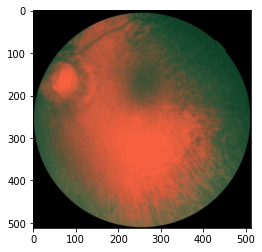

In [ ]:
# Take one image to visualize it's changes after every layer
from tensorflow.keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/Programs/data/training/cataract/1435_left.jpg')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/MyDrive/Programs/data/training/cataract/1435_left.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
# Visualizing output after every layer.
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 65ms/step


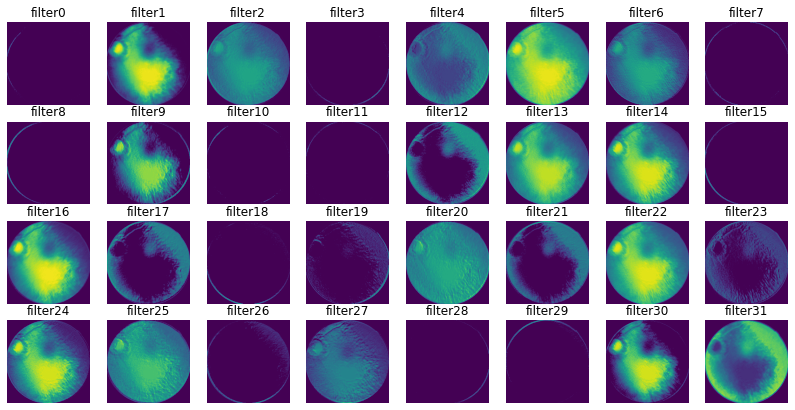

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

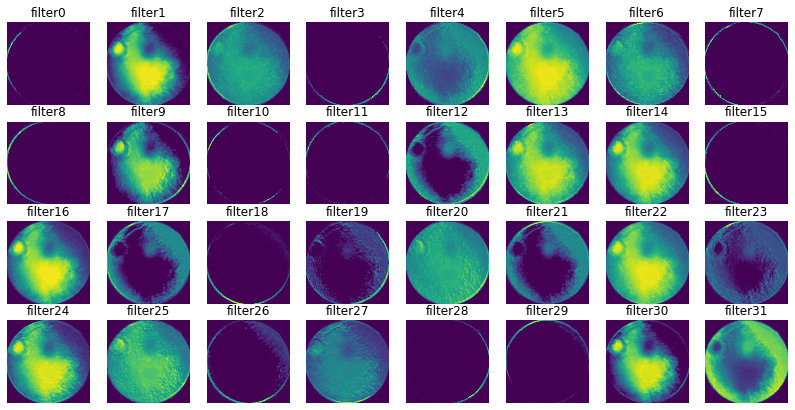

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

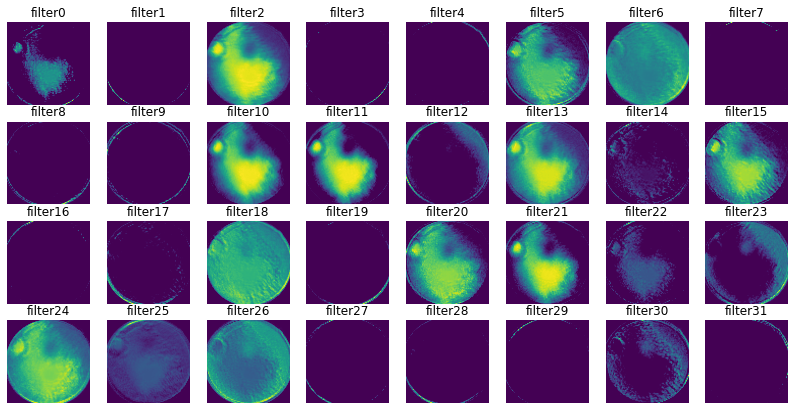

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

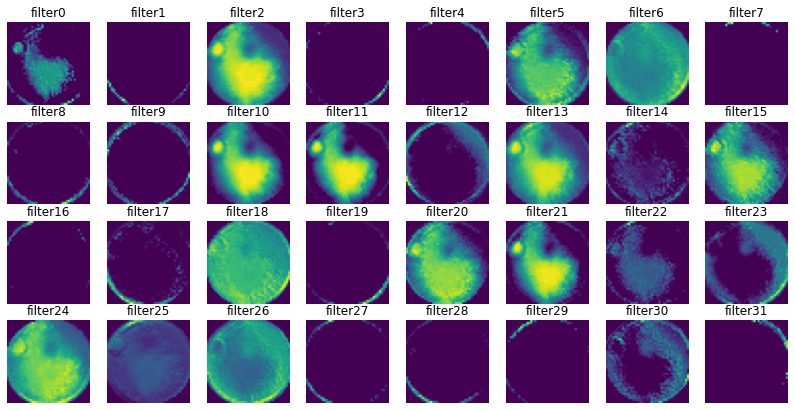

In [ ]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis') 
plt.show()

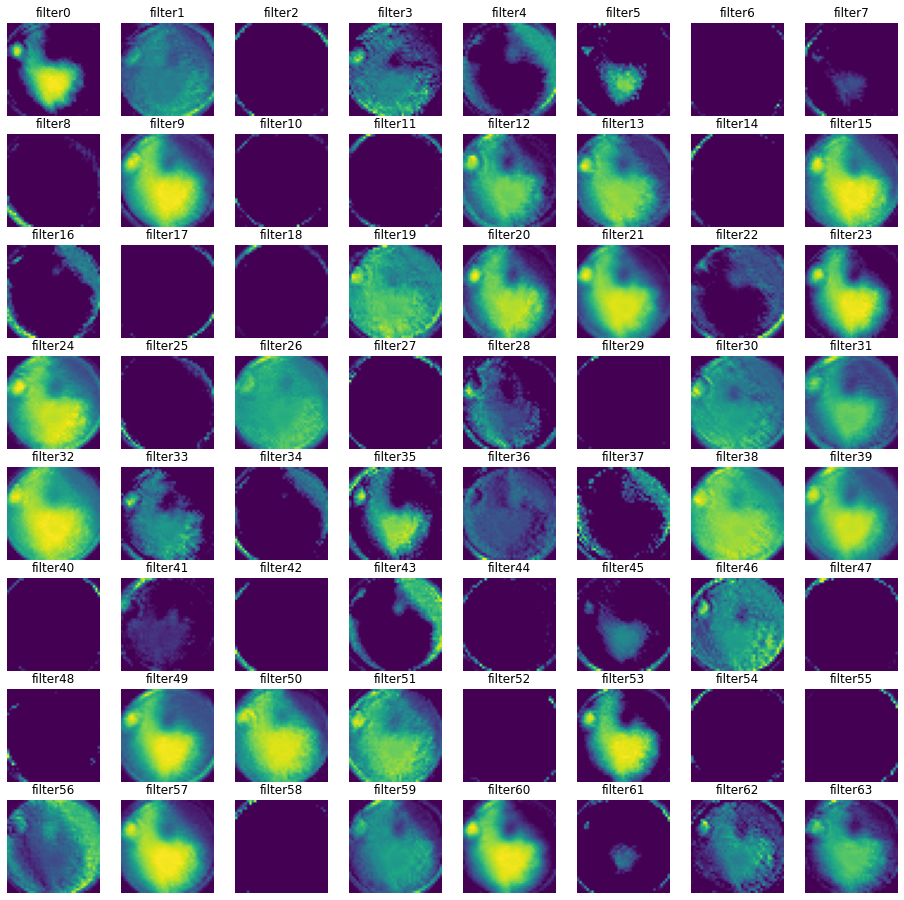

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

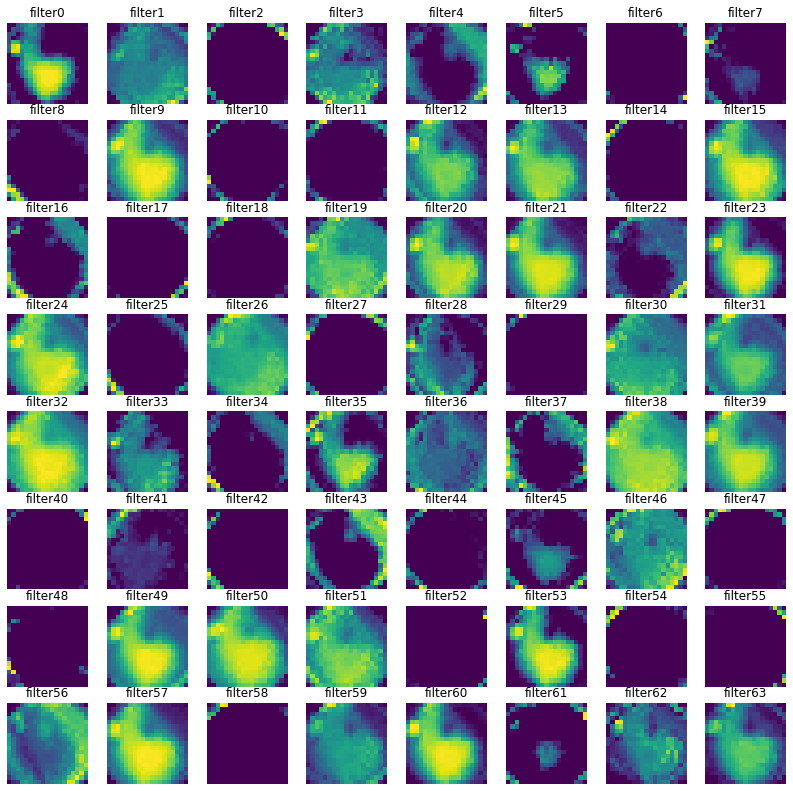

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i],cmap='viridis')
plt.show()

In [ ]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 2112 images belonging to 2 classes.


In [ ]:
# Model building to get trained with parameters.
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs=20,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples// batch_size,verbose=1)

Epoch 1/20
66/66 [==============================] - 743s 11s/step - loss: 0.6166 - accuracy: 0.6610 - val_loss: 0.5298 - val_accuracy: 0.7348
Epoch 2/20
66/66 [==============================] - 131s 2s/step - loss: 0.5246 - accuracy: 0.7339 - val_loss: 0.5203 - val_accuracy: 0.7344
Epoch 3/20
66/66 [==============================] - 95s 1s/step - loss: 0.4981 - accuracy: 0.7528 - val_loss: 0.4435 - val_accuracy: 0.7846
Epoch 4/20
66/66 [==============================] - 99s 2s/step - loss: 0.4582 - accuracy: 0.7822 - val_loss: 0.3907 - val_accuracy: 0.8220
Epoch 5/20
66/66 [==============================] - 96s 1s/step - loss: 0.3945 - accuracy: 0.8201 - val_loss: 0.4678 - val_accuracy: 0.7429
Epoch 6/20
66/66 [==============================] - 96s 1s/step - loss: 0.3759 - accuracy: 0.8381 - val_loss: 0.3432 - val_accuracy: 0.8513
Epoch 7/20
66/66 [==============================] - 95s 1s/step - loss: 0.3391 - accuracy: 0.8461 - val_loss: 0.3214 - val_accuracy: 0.8613
Epoch 8/20
66/66 

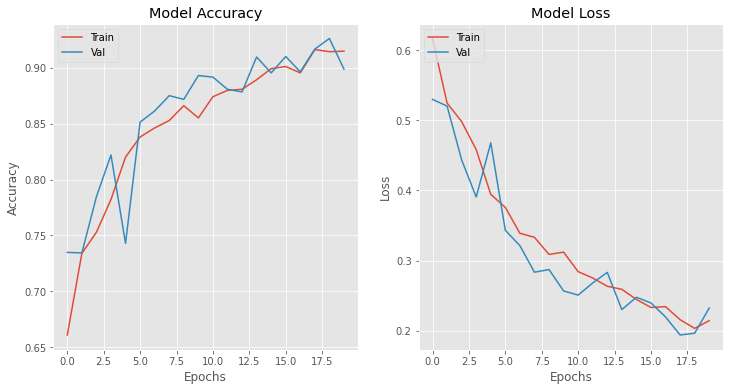

In [ ]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))

epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(train.history['accuracy'], label = 'val_accuracy')
plt.plot(train.history['val_accuracy'], label = 'val_accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(train.history['loss'], label = 'val_loss')
plt.plot(train.history['val_loss'], label = 'val_accuracy')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Val"],loc = "upper left")

plt.show()

In [ ]:
from keras.models import save_model
tf.keras.models.save_model(model,'model.pbtxt')

converter = tf.lite.TFLiteConverter.from_keras_model(model=model)

model_tflite = converter.convert()

open("cataracrPredictionModel.tflite", "wb").write(model_tflite)

47707944

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Programs/data/testing/1_normal/NL_003.png', target_size = (256,256))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
  prediction = "cataract"
else:
  prediction = "normal"

print("Your input image is predicted as " + prediction)

1/1 [==============================] - 0s 20ms/step
Your input image is predicted as normal


In [ ]:
import random
from PIL import Image 
from skimage.io import imread
import numpy as np
from keras.preprocessing import image

images = []
for folder in os.listdir(test_dir):
  for image in os.listdir(test_dir + '/' + folder):
    images.append(os.path.join(test_dir, folder, image))

plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(16):
  n += 1
  random_img = random.choice(images)
  imgs = imread(random_img)
  plt.subplot(4, 4, n)
  axis ='off'
  plt.imshow(imgs)
  train_generator.class_indices
  test_image = test_dir[random_img][0]
  result = test_dir[random_img][1]
  if result[0][0] == 1:
    prediction = "cataract"
  else:
    prediction = "normal"

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

x = np.array([i[0] for i in train_dir]).reshape(-1,256,256,3)
y = np.array([i[1] for i in train_dir])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
y_pred = model.predict_classes(x_test)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);